In [1]:
!pip install graphviz

# **Decision Tree Basic**

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
features = iris.data
targets = iris.target

X_train, X_test, Y_train, Y_test = train_test_split(features, targets, test_size = 0.2)

clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [3]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(clf, out_file="tree.dot", class_names=iris.target_names , feature_names = iris.feature_names, impurity=True, filled=True)

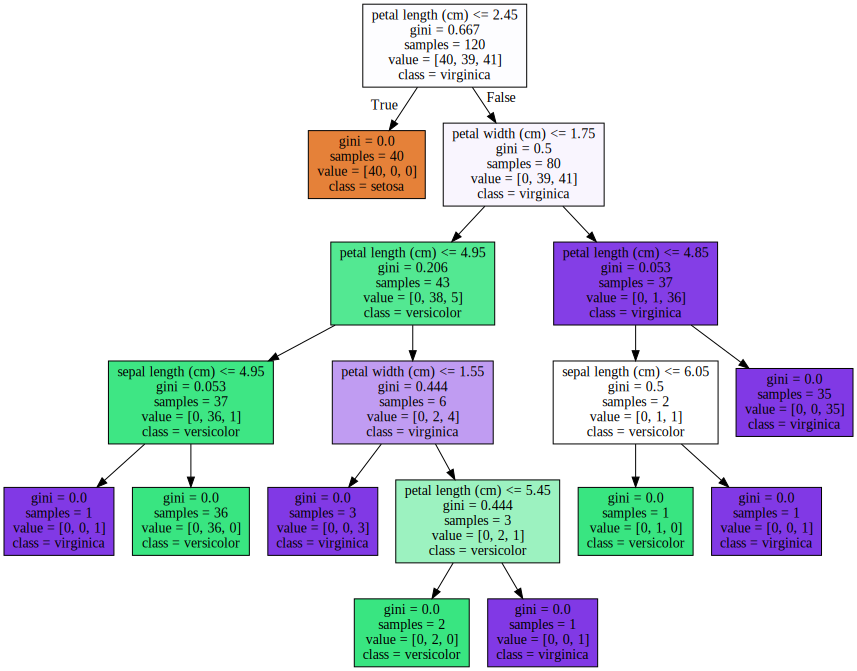

In [4]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

sepal length (cm) : 0.037
sepal width (cm) : 0.000
petal length (cm) : 0.582
petal width (cm) : 0.382


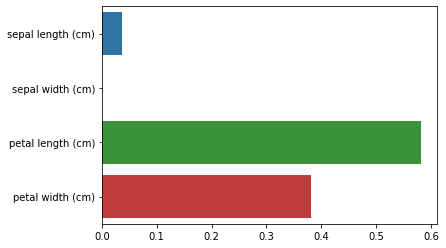

In [5]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature별 importance 매핑
for name, value in zip(iris.feature_names , clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=clf.feature_importances_ , y=iris.feature_names)

# **사용자 행동 분류**

In [6]:
%cd /content/drive/MyDrive/Colab\ Notebooks/머신러닝/4장

/content/drive/MyDrive/Colab Notebooks/머신러닝/4장


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')

In [8]:
df1['Activity'].value_counts() # label 분포 비슷

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [9]:
X_train = df1.drop('Activity', axis = 1, inplace = False)
Y_train = df1['Activity']

X_test = df2.drop('Activity', axis = 1, inplace = False)
Y_test = df2['Activity']

In [10]:
X_train.isna().sum().sum()

0

In [11]:
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)
pred = clf.predict(X_test)

acc = accuracy_score(Y_test, pred)
print('Acc : ',acc)

print('Hyperparameters : ', clf.get_params())

Acc :  0.8649474041398032
Hyperparameters :  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


In [12]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth' : [6, 8, 10, 12, 16, 20, 24]}

grid_cv = GridSearchCV(clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , Y_train)
print('최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('최적 하이퍼 파라미터:', grid_cv.best_params_)


Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.9min finished


최고 평균 정확도 수치:0.8573
최적 하이퍼 파라미터: {'max_depth': 8}


In [13]:
max_depths = [ 6, 8 ,10, 12, 16 ,20, 24]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth)
    dt_clf.fit(X_train , Y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(Y_test , pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth , accuracy))

max_depth = 6 정확도: 0.8565
max_depth = 8 정확도: 0.8728
max_depth = 10 정확도: 0.8673
max_depth = 12 정확도: 0.8656
max_depth = 16 정확도: 0.8619
max_depth = 20 정확도: 0.8582
max_depth = 24 정확도: 0.8500


In [14]:
params = {
    'max_depth' : [ 8 , 10, 12 ,20], 
    'min_samples_split' : [16,24],
}

grid_cv = GridSearchCV(clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , Y_train)
print('최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('최적 하이퍼 파라미터:', grid_cv.best_params_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  2.2min finished


최고 평균 정확도 수치: 0.8520
최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 24}


In [15]:
best_clf = grid_cv.best_estimator_ # optimal model

pred1 = best_clf.predict(X_test)
accuracy = accuracy_score(Y_test , pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8751


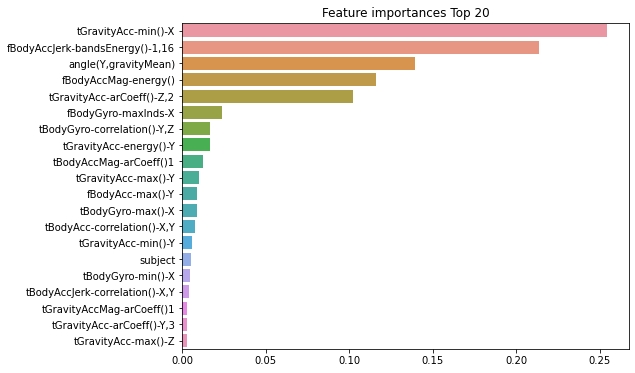

In [16]:
import seaborn as sns

feature_importances = best_clf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
feature_importances = pd.Series(feature_importances, index=X_train.columns)

# 중요도값 순으로 Series를 정렬
feature_top20 = feature_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=feature_top20 , y = feature_top20.index)
plt.show()